## Test Distribution Visualization

In [2]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time

from comparison.ensemble import RegressionTreeBoosting, RegressionTreeEnsemble
from comparison.EKNN import EKNN

0.08027985527365845

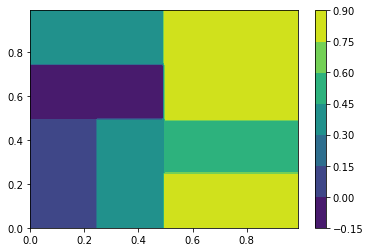

In [3]:
generator=TestDistribution(6).returnDistribution()
np.random.seed(3)
X_train,Y_train=generator.generate(1000)
axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
model = RegressionTree(estimator="extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=4,
                         truncate_ratio_low= 0.1,
                         truncate_ratio_up= 0.98)
model.fit(X_train, Y_train)
predict_result=model.predict(X_grid).reshape(-1,100)
np.mean((model.predict(X_grid)-np.mean(X_grid,axis=1))**2)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

In [4]:
from sklearn.ensemble import GradientBoostingRegressor


model_GBRT = GradientBoostingRegressor(n_estimators = 2)

model_GBRT.fit(X_train, Y_train.ravel())
y_hat=model_GBRT.predict(X_grid)
mse_score = MSE(y_hat, np.mean(X_grid,axis=1))
mse_score

GradientBoostingRegressor(n_estimators=2)

0.02700280573473826

In [5]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time


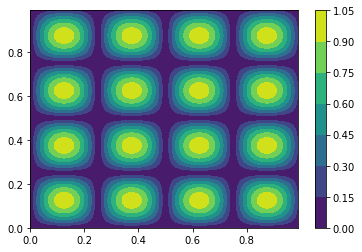

In [6]:
generator=TestDistribution(7,dim=2).returnDistribution()
np.random.seed(3)

axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T

predict_result=generator.evaluate(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

0.04038465838927266

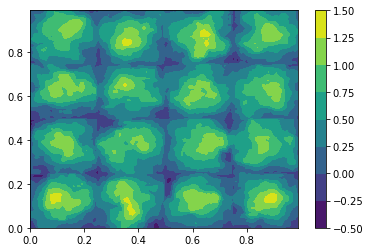

In [26]:
generator=TestDistribution(7).returnDistribution()
np.random.seed(1)
X_train,Y_train=generator.generate(3000)
X_test,Y_test = generator.generate(1000)
axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=4,
                         order=1,
                         random_state=4,
                         truncate_ratio_low=0,
                         truncate_ratio_up= 1,
                      r_range_low=0.1,
                      r_range_up=0.6)
model.fit(X_train, Y_train)
predict_result=model.predict(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()
MSE(model.predict(X_grid),generator.evaluate(X_grid))

In [39]:
generator=TestDistribution(7).returnDistribution()
np.random.seed(1)
X_train,Y_train=generator.generate(2000)
X_test,Y_test = generator.generate(10000)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=4,
                         order=1,
                         random_state=4,
                         truncate_ratio_low= 0,
                         truncate_ratio_up= 1,
                      r_range_low=0,
                      r_range_up=0.55)
model.fit(X_train, Y_train)
y_hat=model.predict(X_test)

MSE(y_hat, Y_test)

0.16697131791471828

In [33]:
from sklearn.ensemble import GradientBoostingRegressor


model_GBRT = GradientBoostingRegressor(n_estimators = 100)

_=model_GBRT.fit(X_train, Y_train)
y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

0.11568484584946018

array([[0.  , 0.25],
       [0.25, 0.5 ]])

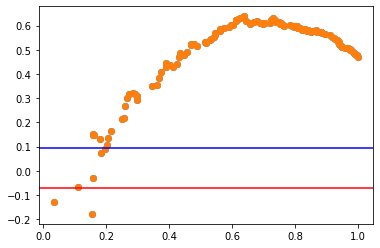

In [41]:
node_idx=1
ERT_model=model
query_obj=list(ERT_model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= X_range.mean(axis=0)+0.1
order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up= 1,0,1,0,0.7

sorted_ratio, sorted_prediction, intercept = ERT_model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up,r_range_low, r_range_up)
_=plt.scatter((sorted_ratio),sorted_prediction)
_=plt.scatter((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")

## Ensemble 

In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time

from comparison.ensemble import RegressionTreeBoosting, RegressionTreeEnsemble
from comparison.EKNN import EKNN

In [2]:
generator=TestDistribution(7).returnDistribution()
np.random.seed(1)
X_train,Y_train=generator.generate(2000)
X_test,Y_test = generator.generate(1000)
model_boosting = RegressionTreeBoosting(rho=0.1,
                      boost_num= 100,
                      estimator="naive_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=4,)

_=model_boosting.fit(X_train, Y_train)
y_hat=model_boosting.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

0.19528987180570548